In [1]:
import taivision  # newly add library


In [2]:
# Commonly used CV tools
import os
import cv2     # for capturing videos
import math   # for mathematical operations
import pickle
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
import numpy as np    # for mathematical operations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from tqdm import tqdm

In [3]:
# for model architectures
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torch.utils.data as data
import torchvision
from torch.autograd import Variable
from functions import *

In [4]:

# Read file names into the train dataframe
# open the .txt file which have names of training videos
f = open("/home/xuel/xw/guohaoyu/taivision/data/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]
train.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi


In [5]:
# Get the tagnames from folder names¶
train_video_tag = []
for i in range(train.shape[0]):
    train_video_tag.append(train['video_name'][i].split('/')[0])

train['tag'] = train_video_tag
train.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup


In [6]:
# Create test data frame and corresponding tags
# open the .txt file which have names of test videos
f = open("/home/xuel/xw/guohaoyu/taivision/data/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist/testlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
test = pd.DataFrame()
test['video_name'] = videos
test = test[:-1]

# creating tags for test videos
test_video_tag = []
for i in range(test.shape[0]):
    test_video_tag.append(test['video_name'][i].split('/')[0])
    # print(video_name)
    
test['tag'] = test_video_tag
test.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup


# Create a new folder 'train_1' to contain extracted frames
### use cap.get( ) from cv2 to get certain properties of the video capture

In [7]:
# storing the frames from training videos
for i in tqdm(range(train.shape[0])):
    count = 0
    videoFile = train['video_name'][i]
    cap = cv2.VideoCapture('/home/xuel/xw/guohaoyu/taivision/data/UCF101/UCF-101/'+videoFile.split(' ')[0])
    # print(cap)
    frameRate = cap.get(5) # get frames per second
    print(f'The video is taking at {frameRate} frames per second')
    
    while(cap.isOpened()):
        frameId = cap.get(1) # get current frame number
        ret, frame = cap.read()
        if(ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename = 'train_1/' + videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()

e video is taking at 25.0 frames per second
 92%|█████████▏| 3470/3783 [03:37<00:13, 23.41it/s]The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
 92%|█████████▏| 3476/3783 [03:38<00:12, 24.48it/s]The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
 92%|█████████▏| 3483/3783 [03:38<00:11, 26.65it/s]The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
The video is taking at 25.0 frames per second
 92%|█████████▏| 3489

## Next, create a .csv file that contains paths to these images as well as their classes 

In [8]:
# get the names of all the images 
from glob import glob
from tqdm import tqdm 
images = glob('train_1/*.jpg')
train_image = []
train_class = []
for i in tqdm(range(len(images))):
    # create the image name 
    train_image.append(images[i].split('/')[1]) # this is corret, has no problem 
    # print(images[i].split('/')[1].split('_')[1])
    # create the class of this image, the activity name
    train_class.append(images[i].split('/')[1].split('_')[1])



100%|██████████| 28897/28897 [00:00<00:00, 552448.60it/s]


In [9]:
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# save dataframe into `.csv` file
train_data.to_csv('/home/xuel/xw/guohaoyu/taivision/data/UCF101/UCF-101/train_new.csv', header = True, index=False)

## Training most basic video classification model _
## Here we will consider using the most basic architecture 3D-CNN with a very light base architecture: VGG-16

We have created our training image names are corresponding classes in a dataframe. Now we just need to:

* Define model architecture
* Train and validate performance using unseen data
* Hyper-parameter tuning
* Upgrade model capability and repeat process for better accuracy

In [10]:
data_path = '../../../data/jpegs_256/jpegs_256/'             # preprocessed RGB images
action_name_path = './UCF101actions.pkl' # preprocessed action names
save_model_path = './Conv3D_ckpt'

## 3D CNN parameters 

In [11]:
# architecture parameters
fc_hidden1, fc_hidden2 = 256, 256
dropout = 0.0        # dropout probability

# training parameters
k = 101            # number of target category
epochs = 10        # do adjust here for shorter training period
batch_size = 8
learning_rate = 1e-4
log_interval = 10
img_x, img_y = 256, 342  # resize video 2d frame size

## For 3D CNN we will need to determine a fixed No.frames and here we take 28 for UCF 101

In [12]:
begin_frame, end_frame, skip_frame = 1, 29, 1
# print(device)

## 3D CNN module

In [13]:
class CNN3D(nn.Module):
    def __init__(self, t_dim=120, img_x=90, img_y=120, drop_p=0.2, fc_hidden1=256, fc_hidden2=128, num_classes=50):
        super(CNN3D, self).__init__()

        # set video dimension
        self.t_dim = t_dim
        self.img_x = img_x
        self.img_y = img_y
        # fully connected layer hidden nodes
        self.fc_hidden1, self.fc_hidden2 = fc_hidden1, fc_hidden2
        self.drop_p = drop_p
        self.num_classes = num_classes
        self.ch1, self.ch2 = 32, 48
        self.k1, self.k2 = (5, 5, 5), (3, 3, 3)  # 3d kernel size
        self.s1, self.s2 = (2, 2, 2), (2, 2, 2)  # 3d strides
        self.pd1, self.pd2 = (0, 0, 0), (0, 0, 0)  # 3d padding

        # compute conv1 & conv2 output shape
        self.conv1_outshape = conv3D_output_size((self.t_dim, self.img_x, self.img_y), self.pd1, self.k1, self.s1)
        self.conv2_outshape = conv3D_output_size(self.conv1_outshape, self.pd2, self.k2, self.s2)

        self.conv1 = nn.Conv3d(in_channels=1, out_channels=self.ch1, kernel_size=self.k1, stride=self.s1,
                               padding=self.pd1)
        self.bn1 = nn.BatchNorm3d(self.ch1)
        self.conv2 = nn.Conv3d(in_channels=self.ch1, out_channels=self.ch2, kernel_size=self.k2, stride=self.s2,
                               padding=self.pd2)
        self.bn2 = nn.BatchNorm3d(self.ch2)
        self.relu = nn.ReLU(inplace=True)
        self.drop = nn.Dropout3d(self.drop_p)
        self.pool = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(self.ch2 * self.conv2_outshape[0] * self.conv2_outshape[1] * self.conv2_outshape[2],
                             self.fc_hidden1)  # fully connected hidden layer
        self.fc2 = nn.Linear(self.fc_hidden1, self.fc_hidden2)
        self.fc3 = nn.Linear(self.fc_hidden2, self.num_classes)  # fully connected layer, output = multi-classes

    def forward(self, x_3d):
        # Conv 1
        x = self.conv1(x_3d)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.drop(x)
        # Conv 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.drop(x)
        # FC 1 and 2
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=self.drop_p, training=self.training)
        x = self.fc3(x)
        return x 

In [14]:
from torchsummaryX import summary

In [15]:
from torchviz import make_dot, make_dot_from_trace

In [16]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train() # training model, enable dropout and 
    
    losses = []
    scores = []
    N_count = 0 # count total trained sample in one epoch
    
    for batch_idx, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device).view(-1,) # device is cpu 
        
        N_count += X.size(0)
        
        optimizer.zero_grad()
        output = model(X)    # output size = (batch, number of classes)
        
        loss = F.cross_entropy(output, y)
        losses.append(loss.item())
        
        # to compute accuracy
        y_pred = torch.max(output, 1)[1]  # y_pred != output
        # step_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        step_score = accuracy_score([y.cpu().data.squeeze().numpy()], [y_pred.cpu().data.squeeze().numpy()])
        # a.cpu()和a.data.cpu()是分别把a和a.data放在cpu上，其他的没区别，另外：a.data.cpu()和a.cpu().data一样
        scores.append(step_score)         
        
        loss.backward()
        optimizer.step()
        
        # show information
        if (batch_idx + 1) % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%'.format(
                epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader), loss.item(), 100 * step_score))

    return losses, scores

In [17]:
def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    model.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for X, y in test_loader:
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )

            output = model(X)

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)

    test_loss /= len(test_loader.dataset)

    # to compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())
    # the parameters of accuracy_score() need to be array-like etc, so the correction is likes to the above line. 

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))
    # save Pytorch models of best record
    torch.save(model.state_dict(), os.path.join(save_model_path, '3dcnn_epoch{}.pth'.format(epoch + 1)))  # save spatial_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, '3dcnn_optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return test_loss, test_score


# prepare for training 

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

params = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True} if torch.cuda.is_available() else {}

# load UCF101 label categories
with open(action_name_path, 'rb') as f:
    action_names = pickle.load(f)
    
print(f'we have {len(action_names)} categories')

# conver labels to categories using LabelEncoder()
le = LabelEncoder()
le.fit(action_names)





we have 101 categories
/home/xuel/anaconda3/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


LabelEncoder()

In [19]:
# Then one-hot-encoding the categorical labels
action_category = le.transform(action_names).reshape(-1,1)  # map from names to a number from [0,100]
enc = OneHotEncoder()
enc.fit(action_category)

actions = []
fnames = os.listdir(data_path)

all_names = []
for f in fnames:
    loc1 = f.find('v_')
    loc2 = f.find('_g')
    actions.append(f[(loc1 + 2): loc2])
    all_names.append(f)

all_X_list = all_names
all_y_list = labels2cat(le, actions)

# train, test split
train_list, test_list, train_label, test_label = train_test_split(all_X_list, all_y_list, test_size=0.25, random_state=42)

In [20]:
# image transformation
transform = transforms.Compose([transforms.Resize([img_x, img_y]),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])

selected_frames = np.arange(begin_frame, end_frame, skip_frame).tolist() # a list from 1 to 28

train_set = Dataset_3DCNN(data_path, train_list, train_label, selected_frames, transform=transform)
valid_set = Dataset_3DCNN(data_path, test_list, test_label, selected_frames, transform=transform)
train_loader = data.DataLoader(train_set, **params)
valid_loader = data.DataLoader(valid_set, **params)

cnn3d = CNN3D(t_dim=len(selected_frames), 
              img_x=img_x, 
              img_y=img_y, 
              drop_p=dropout, 
              fc_hidden1=fc_hidden1,
              fc_hidden2=fc_hidden2,
              num_classes=k
            ).to(device)
# use classic adam optimizer 
optimizer = torch.optim.Adam(cnn3d.parameters(), lr = learning_rate)

In [21]:
input_X, label = next(iter(train_loader))
input_X.shape

torch.Size([1, 1, 28, 256, 342])

In [22]:
model= cnn3d.cpu()
summary(model, torch.zeros((8,1,28,256,342)))

              Kernel Shape           Output Shape       Params    Mult-Adds
Layer                                                                      
0_conv1   [1, 32, 5, 5, 5]  [8, 32, 12, 126, 169]       4.032k    1.022112G
1_bn1                 [32]  [8, 32, 12, 126, 169]         64.0         32.0
2_relu                   -  [8, 32, 12, 126, 169]            -            -
3_drop                   -  [8, 32, 12, 126, 169]            -            -
4_conv2  [32, 48, 3, 3, 3]     [8, 48, 5, 62, 84]       41.52k  1.07993088G
5_bn2                 [48]     [8, 48, 5, 62, 84]         96.0         48.0
6_relu                   -     [8, 48, 5, 62, 84]            -            -
7_drop                   -     [8, 48, 5, 62, 84]            -            -
8_fc1       [1249920, 256]               [8, 256]  319.979776M   319.97952M
9_fc2           [256, 256]               [8, 256]      65.792k      65.536k
10_fc3          [256, 101]               [8, 101]      25.957k      25.856k
------------

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_conv1,"[1, 32, 5, 5, 5]","[8, 32, 12, 126, 169]",4032.0,1.022112e+09
1_bn1,[32],"[8, 32, 12, 126, 169]",64.0,3.200000e+01
2_relu,-,"[8, 32, 12, 126, 169]",NaN,NaN
3_drop,-,"[8, 32, 12, 126, 169]",NaN,NaN
4_conv2,"[32, 48, 3, 3, 3]","[8, 48, 5, 62, 84]",41520.0,1.079931e+09
5_bn2,[48],"[8, 48, 5, 62, 84]",96.0,4.800000e+01
6_relu,-,"[8, 48, 5, 62, 84]",NaN,NaN
7_drop,-,"[8, 48, 5, 62, 84]",NaN,NaN
8_fc1,"[1249920, 256]","[8, 256]",319979776.0,3.199795e+08


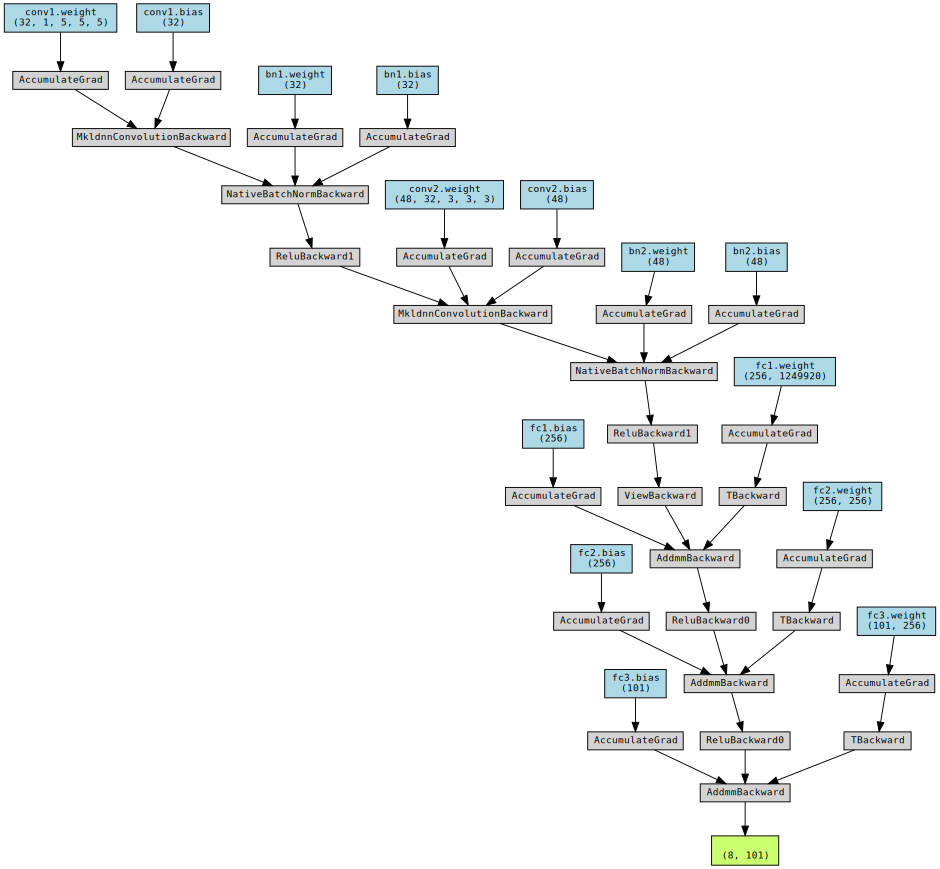

In [23]:
make_dot(model(torch.zeros((8,1,28,256,342))), params=dict(model.named_parameters()))

## Actual Training

In [24]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses = []
epoch_test_scores = []

# start training
for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, cnn3d, device, train_loader, optimizer, epoch)
    epoch_test_loss, epoch_test_score = validation(cnn3d, device, optimizer, valid_loader)

    # save results
    epoch_train_losses.append(train_losses)
    epoch_train_scores.append(train_scores)
    epoch_test_losses.append(epoch_test_loss)
    epoch_test_scores.append(epoch_test_score)

    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses)
    D = np.array(epoch_test_scores)
    np.save('./3DCNN_epoch_training_losses.npy', A)
    np.save('./3DCNN_epoch_training_scores.npy', B)
    np.save('./3DCNN_epoch_test_loss.npy', C)
    np.save('./3DCNN_epoch_test_score.npy', D)





9990 (67%)]	Loss: 4.545547, Accu: 0.00%
Train Epoch: 1 [6730/9990 (67%)]	Loss: 4.568576, Accu: 0.00%
Train Epoch: 1 [6740/9990 (67%)]	Loss: 4.601488, Accu: 0.00%
Train Epoch: 1 [6750/9990 (68%)]	Loss: 4.731063, Accu: 0.00%
Train Epoch: 1 [6760/9990 (68%)]	Loss: 4.630642, Accu: 0.00%
Train Epoch: 1 [6770/9990 (68%)]	Loss: 4.557165, Accu: 0.00%
Train Epoch: 1 [6780/9990 (68%)]	Loss: 4.604748, Accu: 0.00%
Train Epoch: 1 [6790/9990 (68%)]	Loss: 4.620529, Accu: 0.00%
Train Epoch: 1 [6800/9990 (68%)]	Loss: 4.546494, Accu: 0.00%
Train Epoch: 1 [6810/9990 (68%)]	Loss: 4.588907, Accu: 0.00%
Train Epoch: 1 [6820/9990 (68%)]	Loss: 4.701912, Accu: 0.00%
Train Epoch: 1 [6830/9990 (68%)]	Loss: 4.558767, Accu: 0.00%
Train Epoch: 1 [6840/9990 (68%)]	Loss: 4.582757, Accu: 0.00%
Train Epoch: 1 [6850/9990 (69%)]	Loss: 4.599908, Accu: 0.00%
Train Epoch: 1 [6860/9990 (69%)]	Loss: 4.644960, Accu: 0.00%
Train Epoch: 1 [6870/9990 (69%)]	Loss: 4.593140, Accu: 0.00%
Train Epoch: 1 [6880/9990 (69%)]	Loss: 4.6017

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multilabel-indicator targets

In [ ]:
# plot
fig = plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.arange(1, epochs + 1), A[:, -1])  # train loss (on epoch end)
plt.plot(np.arange(1, epochs + 1), C)         #  test loss (on epoch end)
plt.title("model loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc="upper left")
# 2nd figure
plt.subplot(122)
plt.plot(np.arange(1, epochs + 1), B[:, -1])  # train accuracy (on epoch end)
plt.plot(np.arange(1, epochs + 1), D)         #  test accuracy (on epoch end)
# plt.plot(histories.losses_val)
plt.title("training scores")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc="upper left")
title = "./fig_UCF101_3DCNN.png"
plt.savefig(title, dpi=600)
# plt.close(fig)
plt.show()